In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define gene set and relationships for pathway
# Create set of boxes for each gene
# Draw connections for each gene

GENE_RECTANGLE_WIDTH = 60
GENE_RECTANGLE_HEIGHT = 20

def create_rectangle_gene(x_pos, y_pos, facecolor='none'):
    return patches.Rectangle(
        xy=(x_pos, y_pos),
        width=GENE_RECTANGLE_WIDTH,
        height=GENE_RECTANGLE_HEIGHT,
        linewidth=0, # 0.75
        edgecolor='black',
        facecolor=facecolor
    )

def create_rectangle_text(x_pos, y_pos, facecolor='none', edgecolor='none', linewidth=0.75):
    return patches.Rectangle(
        xy=(x_pos, y_pos),
        width=GENE_RECTANGLE_WIDTH,
        height=GENE_RECTANGLE_HEIGHT,
        linewidth=linewidth,
        edgecolor=edgecolor,
        facecolor=facecolor
    )

def get_rectangle_center_position(rectangle):
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width() / 2.0
    cy = ry + rectangle.get_height() / 2.0
    return (cx, cy)

def create_rectangle_gene_set(rectangles, x_padding_coefficient=0.05, y_padding_coefficient=0.10, facecolor='none'):
    # rename to just be create rectangle set
    # add parameter for family, complex, or compartment 
    x_positions = [rectangle.get_xy()[0] for rectangle in rectangles]
    y_positions = [rectangle.get_xy()[1] for rectangle in rectangles]

    x_padding = GENE_RECTANGLE_WIDTH*x_padding_coefficient
    y_padding = GENE_RECTANGLE_HEIGHT*y_padding_coefficient
    x_pos, y_pos = min(x_positions) - x_padding, min(y_positions) - y_padding
    width = max(x_positions) - x_pos + GENE_RECTANGLE_WIDTH + x_padding
    height = max(y_positions) - y_pos + GENE_RECTANGLE_HEIGHT + y_padding
    
    return patches.Rectangle(
        xy=(x_pos,y_pos),
        width=width,
        height=height,
        linewidth=0.75,
        edgecolor='grey',
        facecolor=facecolor
    )
  

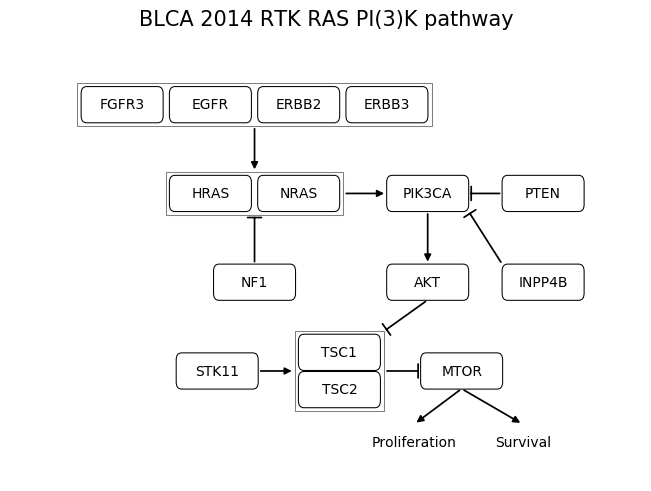

In [11]:
# Define gene set and relationships for pathway
# Create set of boxes for each gene
# Draw connections for each gene

fig, ax = plt.subplots(constrained_layout=True)

# FGFR3, EGFR, ERBB2, ERBB3
y_position = 200
FGFR3 = create_rectangle_gene(50, y_position)
EGFR = create_rectangle_gene(115, y_position)
ERBB2 = create_rectangle_gene(180, y_position)
ERBB3 = create_rectangle_gene(245, y_position)

def create_fancy_box(bb, linewidth=0.75, **kwargs):
    return patches.FancyBboxPatch(
        (bb.xmin, bb.ymin), bb.width, bb.height,
        fc='none', ec='black', linewidth=linewidth,
        boxstyle="round,pad=0.2,rounding_size=4",
        **kwargs)

def plot_box(ax, rectangle, string):
    ax.add_patch(rectangle)
    
    annotation_position = get_rectangle_center_position(rectangle)
    ax.annotate(string, annotation_position, color='black', fontsize=10, ha='center', va='center')
    
    bbox = rectangle.get_bbox()
    fancy_rectangle = create_fancy_box(bbox)
    ax.add_patch(fancy_rectangle)

for gene_box, gene_name in [(FGFR3, 'FGFR3'), (EGFR, 'EGFR'), (ERBB2, 'ERBB2'), (ERBB3, 'ERBB3')]:
    plot_box(ax, gene_box, gene_name)

gene_set_1 = create_rectangle_gene_set([FGFR3, EGFR, ERBB2, ERBB3])
ax.add_patch(gene_set_1)

# HRAS, NRAS, PIK3CA, PTEN
y_position = 150
HRAS = create_rectangle_gene(115, y_position)
NRAS = create_rectangle_gene(180, y_position)

PIK3CA = create_rectangle_gene(275, y_position)
PTEN = create_rectangle_gene(360, y_position)

for gene_box, gene_name in [(HRAS, 'HRAS'), (NRAS, 'NRAS'), (PIK3CA, 'PIK3CA'), (PTEN, 'PTEN')]:
    plot_box(ax, gene_box, gene_name)

gene_set_2 = create_rectangle_gene_set([HRAS, NRAS])
ax.add_patch(gene_set_2)

# NF1, AKT, INPP4B
y_position = 100
NF1 = create_rectangle_gene(get_rectangle_center_position(gene_set_1)[0] - 30, y_position)
AKT = create_rectangle_gene(275, y_position)
INPP4B = create_rectangle_gene(360, y_position)

for gene_box, gene_name in [(NF1, 'NF1'), (AKT, 'AKT'), (INPP4B, 'INPP4B')]:
    plot_box(ax, gene_box, gene_name)
    
# STK11, TSC1, TSC2, MTOR
y_position = 50
STK11 = create_rectangle_gene(120, y_position)
TSC1 = create_rectangle_gene(210, y_position + 10.5)
TSC2 = create_rectangle_gene(210, y_position - 10.5)
MTOR = create_rectangle_gene(300, y_position)

for gene_box, gene_name in [(STK11, 'STK11'), (TSC1, 'TSC1'), (TSC2, 'TSC2'), (MTOR, 'MTOR')]:
    plot_box(ax, gene_box, gene_name)

gene_set_3 = create_rectangle_gene_set([TSC1, TSC2])
ax.add_patch(gene_set_3)

# OUTCOME TEXT
y_position = 10
Proliferation = create_rectangle_text(265, y_position)
Survival = create_rectangle_text(345, y_position)

for text_box, text in [(Proliferation, 'Proliferation'), (Survival, 'Survival')]:
    ax.add_patch(text_box)
    
    annotation_position = get_rectangle_center_position(text_box)
    ax.annotate(text, annotation_position, color='black', fontsize=10, ha='center', va='center')
    
# Arrows

def get_rectangle_position(rectangle, horizontal_alignment='left', vertical_alignment='center'):
    if horizontal_alignment not in ['center', 'left', 'right']:
        raise ValueError(f"invalid horizontal alignment, {horizontal_alignment}. Expects left, center, or right.")
    if vertical_alignment not in ['bottom', 'center', 'top']:
        raise ValueError(f"invalid vertical alignment, {vertical_alignment}. Expects bottom, center, or top.")
    
    if horizontal_alignment == "center":
        x = rectangle.get_xy()[0] + rectangle.get_width() / 2
    elif horizontal_alignment == "left":
        x = rectangle.get_xy()[0]
    elif horizontal_alignment == "right":
        x = rectangle.get_xy()[0] + rectangle.get_width()
    else:
        raise ValueError(f"invalid horizontal alignment, {horizontal_alignment}. Expects left, center, or right.")
    
    if vertical_alignment == "bottom":
        y = rectangle.get_xy()[1]
    elif vertical_alignment == "center":
        y = rectangle.get_xy()[1] + rectangle.get_height() / 2
    elif vertical_alignment == "top":
        y = rectangle.get_xy()[1] + rectangle.get_height()
    else:
        raise ValueError(f"invalid vertical alignment, {vertical_alignment}. Expects bottom, center, or top.")
    
    return float(x), float(y)
    

def draw_interaction(position_A, position_B, interaction_type):
    interaction_to_arrow_types = {
        'activates': ('-|>', '-', 1.25),
        'inhibits': (patches.ArrowStyle.BarAB(widthA=0.0, angleA=0, widthB=0.50, angleB=0), '-', 1.25),
        'induces': ('-|>', '--', 1.25),
        'represses': (patches.ArrowStyle.BarAB(widthA=0.0, angleA=0, widthB=0.50, angleB=0), '--', 1.25),
        'binds': ('-', '-', 1.25)
    }
    
    try:
        arrow_details = interaction_to_arrow_types[interaction_type.lower()]
    except KeyError:
        print(f"{interaction_type} is not a valid interaction type. Valid options: {interaction_to_arrow_types.keys()}")
    
    return patches.FancyArrowPatch(
        posA=position_A, posB=position_B,
        arrowstyle=arrow_details[0],
        linestyle=arrow_details[1],
        color='black',
        linewidth=arrow_details[2],
        mutation_scale=10
    )

arrow = draw_interaction(
    position_A=(get_rectangle_center_position(gene_set_1)[0], gene_set_1.get_xy()[1]),
    position_B=(get_rectangle_center_position(gene_set_2)[0], gene_set_2.get_xy()[1] + gene_set_2.get_height()),
    interaction_type='activates'
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A=(
        gene_set_2.get_xy()[0] + gene_set_2.get_width(), 
        gene_set_2.get_xy()[1] + gene_set_2.get_height() / 2
    ),
    position_B=(
        PIK3CA.get_xy()[0], 
        PIK3CA.get_xy()[1] + PIK3CA.get_height() / 2
    ),
    interaction_type='activates'
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A=(PTEN.get_xy()[0], PTEN.get_xy()[1] + PTEN.get_height() / 2),
    position_B=(PIK3CA.get_xy()[0] + PIK3CA.get_width(), PIK3CA.get_xy()[1] + PIK3CA.get_height() / 2),
    interaction_type='inhibits'
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A=(INPP4B.get_xy()[0], INPP4B.get_xy()[1] + INPP4B.get_height()),
    position_B=(PIK3CA.get_xy()[0] + PIK3CA.get_width(), PIK3CA.get_xy()[1]),
    interaction_type='inhibits'
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A=(PIK3CA.get_xy()[0] + PIK3CA.get_width() / 2, PIK3CA.get_xy()[1]),
    position_B=(AKT.get_xy()[0] + AKT.get_width() / 2, AKT.get_xy()[1] + AKT.get_height()),
    interaction_type='activates'
)
ax.add_patch(arrow)


arrow = draw_interaction(
    position_A = get_rectangle_position(AKT, horizontal_alignment="center", vertical_alignment="bottom"),
    position_B = get_rectangle_position(gene_set_3, horizontal_alignment="right", vertical_alignment="top"),
    interaction_type="inhibits"
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A = get_rectangle_position(NF1, horizontal_alignment="center", vertical_alignment="top"),
    position_B = get_rectangle_position(gene_set_2, horizontal_alignment="center", vertical_alignment="bottom"),
    interaction_type="inhibits"
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A = get_rectangle_position(STK11, horizontal_alignment="right", vertical_alignment="center"),
    position_B = get_rectangle_position(gene_set_3, horizontal_alignment="left", vertical_alignment="center"),
    interaction_type="activates"
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A = get_rectangle_position(gene_set_3, horizontal_alignment="right", vertical_alignment="center"),
    position_B = get_rectangle_position(MTOR, horizontal_alignment="left", vertical_alignment="center"),
    interaction_type="inhibits"
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A = get_rectangle_position(MTOR, horizontal_alignment="center", vertical_alignment="bottom"),
    position_B = get_rectangle_position(Proliferation, horizontal_alignment="center", vertical_alignment="top"),
    interaction_type="activates"
)
ax.add_patch(arrow)

arrow = draw_interaction(
    position_A = get_rectangle_position(MTOR, horizontal_alignment="center", vertical_alignment="bottom"),
    position_B = get_rectangle_position(Survival, horizontal_alignment="center", vertical_alignment="top"),
    interaction_type="activates"
)
ax.add_patch(arrow)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.title('BLCA 2014 RTK RAS PI(3)K pathway', fontsize=15)

plt.xlim([0, 460])
plt.ylim([0, 250])

plt.tick_params(axis="both", which="both", 
                bottom=False, top=False, left=False, right=False,  
                labelbottom=False, labeltop=False, labelleft=False, labelright=False) 

for file_type in ['eps', 'pdf', 'png', 'svg']:
    plt.savefig(f'PI3K.{file_type}', format=file_type, bbox_inches='tight', dpi=300)

plt.show()
